In [10]:
%matplotlib inline

import os
from os.path import join
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
ftir_dir = join(dir_path, 'ball-data', 'ftir')
felt_dir = join(ftir_dir, 'felt')
rubber_dir = join(ftir_dir, 'rubber')

In [3]:
def get_x_y_from_dx_file(filepath):

    curr_line = 0
    X = []
    Y = []

    for line in open(filepath, 'r'):
        if 'YFACTOR' in line:
            num = line[line.index('=') + 1:]
            y_scale = float(num)
        if curr_line >= 19:
            split = line.strip().split('+')
            if '##END=' in split:
                continue
            split = [float(s) for s in split]
            x = split[0]
            ys = split[1:]
            y_val = mean(ys)
            X.append(x)
            Y.append(y_val * y_scale / 2)
        curr_line += 1
    return X, Y

In [47]:
def plot_files_filtered(dir_name, filter_func):
    fps = []
    for subdir, dirs, files in os.walk(dir_name):
        for f in files:
            #print os.path.join(subdir, file)
            filepath = os.path.join(subdir, f)

            if filepath.endswith(".dx") and filter_func(f):
                fps.append(filepath)
    fps = sorted(fps)
    for filepath in fps:
        f = os.path.basename(filepath)
        no_filetype = f[:f.index('.dx')]
        X, Y = get_x_y_from_dx_file(filepath)
        plt.plot(X, Y, label=no_filetype)
    plt.gca().invert_xaxis()
    plt.legend(loc=0)
    plt.xlabel('cm^-1')
    plt.ylabel('absorbance')
    
def plot_ftir_brand(brand_name):
    brand_name = brand_name[0].upper() + brand_name[1:]
    plot_files_filtered(felt_dir, lambda x: brand_name.lower() in x.lower())
    plt.title(brand_name + " Felt")
    plt.savefig(os.path.join(felt_dir, 'img', brand_name.lower() + ".svg"))
    
def plot_all_balls_individually(dir_name):
    for subdir, dirs, files in os.walk(dir_name):
        for f in files:
            #print os.path.join(subdir, file)
            filepath = os.path.join(subdir, f)
            if filepath.endswith(".dx"):
                no_filetype = f[:f.index('.dx')]
                plot_files_filtered(dir_name, lambda x: x == f)
                plt.title(no_filetype + ' Felt')
                plt.savefig(os.path.join(felt_dir, 'img', no_filetype + "_felt" + ".svg"))
                plt.clf()

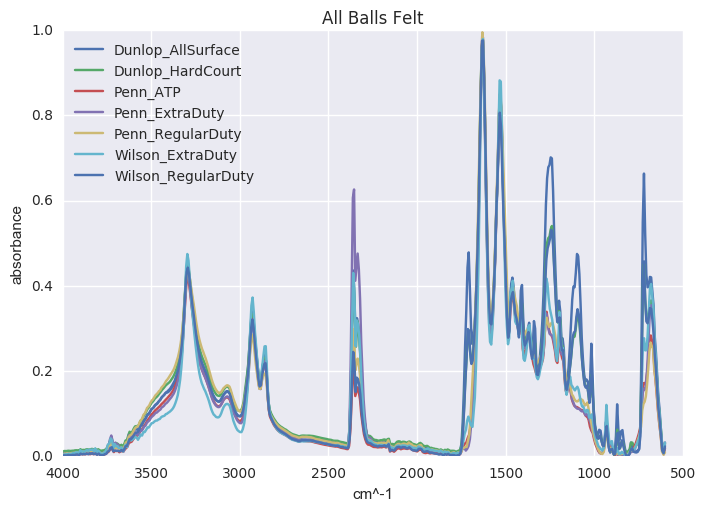

In [48]:
plot_files_filtered(felt_dir, lambda x: True)
plt.title("All Balls Felt")
plt.savefig(os.path.join(felt_dir, 'img', "all_balls.svg"))

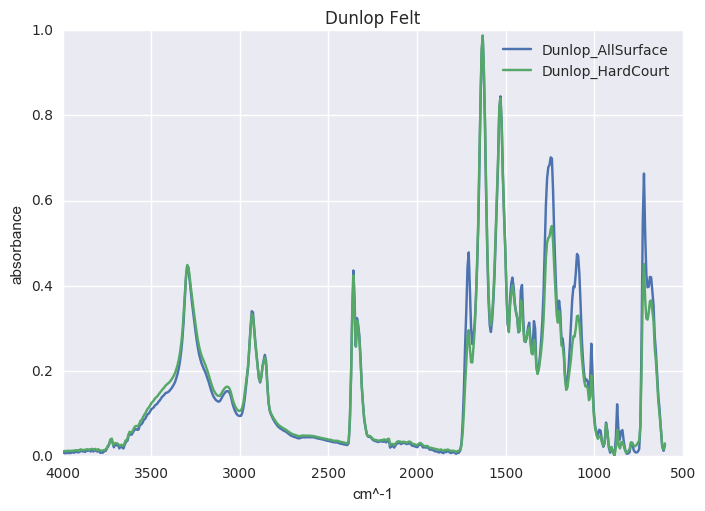

In [49]:
plot_ftir_brand('penn')
plt.clf()
plot_ftir_brand('wilson')
plt.clf()
plot_ftir_brand('dunlop')

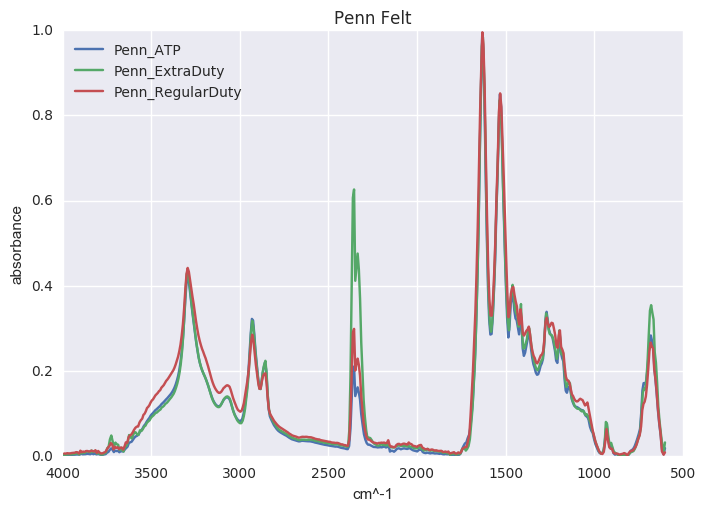

In [50]:
plot_files_filtered(felt_dir, lambda x: 'penn' in x.lower())
plt.title("Penn Felt")
plt.savefig(os.path.join(felt_dir, 'img', "penn.svg"))

In [51]:
plot_all_balls_individually(felt_dir)

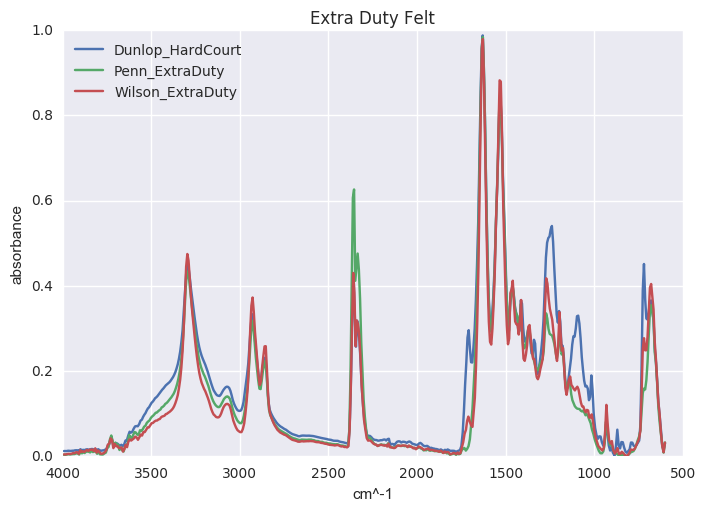

In [54]:
plot_files_filtered(felt_dir, lambda x: 'extra' in x.lower() or 'hard' in x.lower())
plt.title("Extra Duty Felt")
plt.savefig(os.path.join(felt_dir, 'img', "extra_duty.svg"))

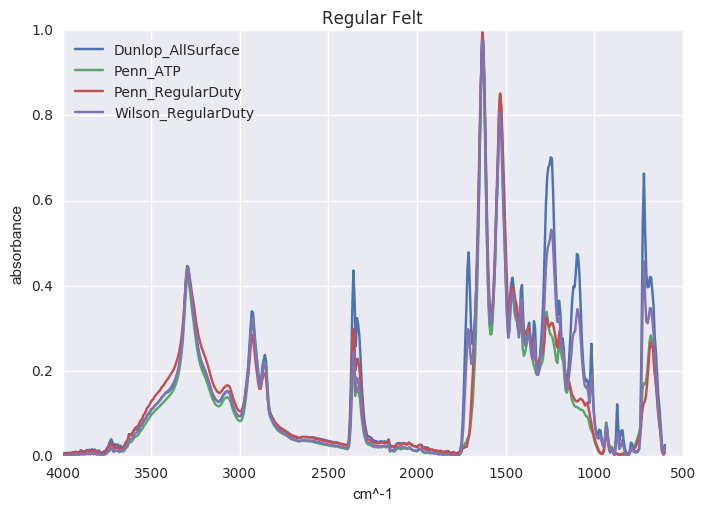

In [55]:
plot_files_filtered(felt_dir, lambda x: not ('extra' in x.lower() or 'hard' in x.lower()))
plt.title("Regular Felt")
plt.savefig(os.path.join(felt_dir, 'img', "regular_duty.svg"))